## Import

In [271]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [124]:
%run naturalGas_Wrangling.ipynb

## Electric Energy Forecast

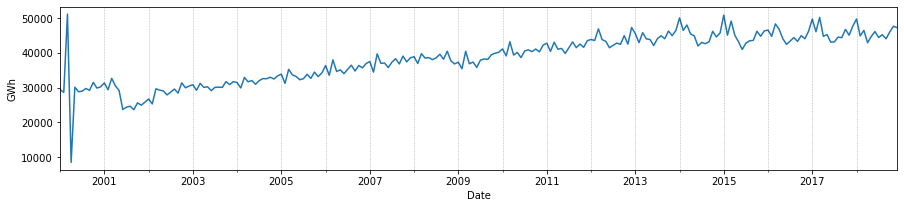

In [290]:
ts_energy.plot(figsize=(15,3))
plt.legend().remove()
plt.ylabel('GWh')
for year in range(2000,2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3, lw=0.5)

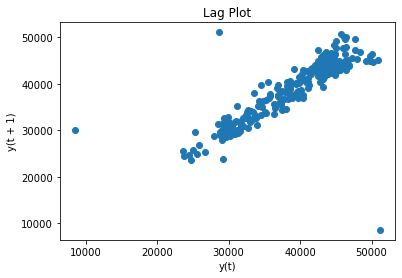

In [41]:
# Plotting the electry energy production data (t) on the x-axis against the electry energy production on the previous month (t-1) on y-axis

lag_plot(ts_energy)
plt.title('Lag Plot')
plt.show()

In [90]:
# Anual Data Correlation 
values = pd.DataFrame(ts_energy.values).copy()
dataframe = pd.concat([values.shift(12), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.00000,0.91207
t+1,0.91207,1.00000


In [91]:
# Month Data Correlation
values = pd.DataFrame(ts_energy.values).copy()
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.824236
t+1,0.824236,1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

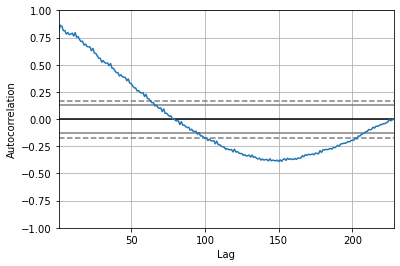

In [23]:
pd.plotting.autocorrelation_plot(ts_energy)

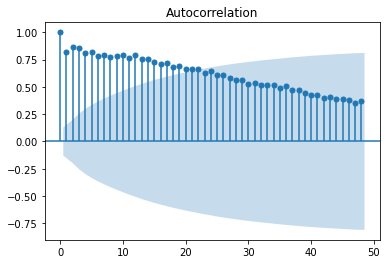

In [263]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ts_energy.values.squeeze(), lags=48);

## Hydroelectric Energy

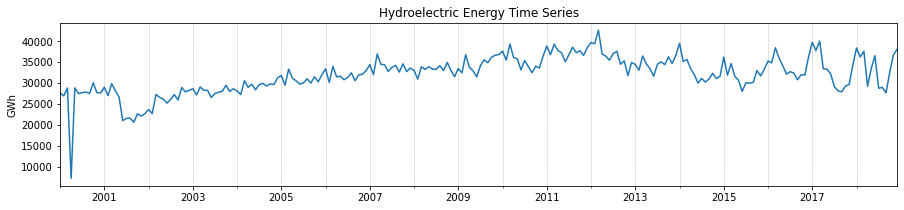

In [261]:
ts_hydro.plot(figsize=(15,3))
plt.legend().remove()
plt.title('Hydroelectric Energy Time Series')
plt.ylabel('GWh')
for year in range(2000,2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3, lw=0.5)


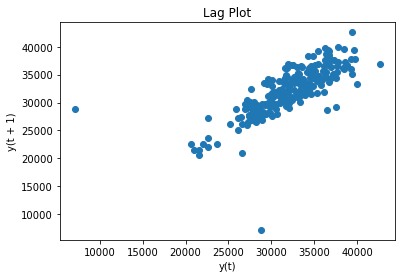

In [121]:
# Plotting the electry energy production data (t) on the x-axis against the electry energy production on the previous month (t-1) on y-axis

lag_plot(ts_hydro)
plt.title('Lag Plot')
plt.show()

In [122]:
# Month Data Correlation
values = pd.DataFrame(ts_hydro.values).copy()
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.764015
t+1,0.764015,1.000000


## Precipitation Time Series

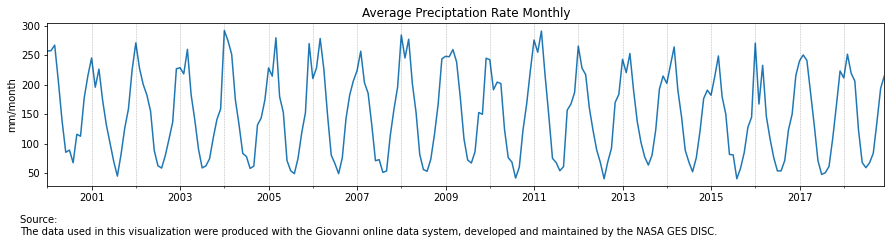

In [240]:
ts_precip.plot(figsize=(15,3))
plt.ylabel('mm/month')
plt.title(precip.title)
plt.figtext(0.1,-0.1, precip.footer)
for year in range(2000,2019):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.3, lw=0.5)


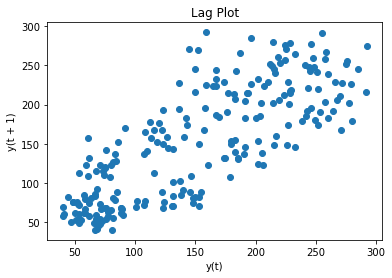

In [245]:
# Plotting the electry energy production data (t) on the x-axis against the electry energy production on the previous month (t-1) on y-axis

lag_plot(ts_precip)
plt.title('Lag Plot')
plt.show()

In [246]:
# Month Data Correlation
values = pd.DataFrame(ts_precip.values).copy()
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
result

,t-1,t+1
t-1,1.000000,0.794208
t+1,0.794208,1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

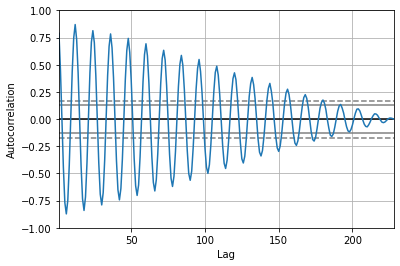

In [247]:
pd.plotting.autocorrelation_plot(ts_precip)

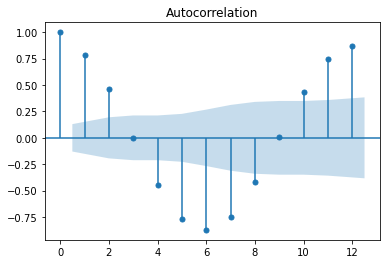

In [291]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(ts_precip.values.squeeze(), lags=12);
#pd.plotting.plot_acf(ts_energy, lags=12)

<AxesSubplot:>

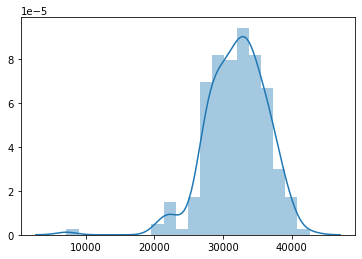

In [266]:
sns.distplot(ts_hydro)

## Testing Data

In [269]:
X = ts_hydro
y = ts_precip

In [272]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

In [282]:
print(y_train.shape)
print(y_test.shape)


(159,)
(69,)


<AxesSubplot:>

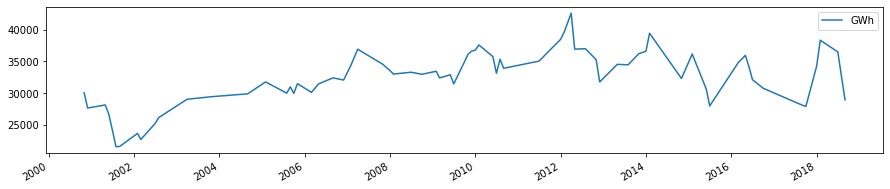

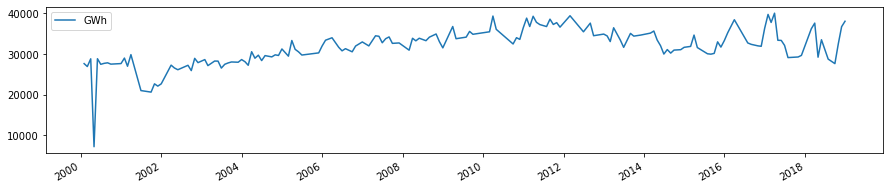

In [289]:
X_test.plot(figsize=(15,3))
X_train.plot(figsize=(15,3))